# Draw Causal Graph

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.
And to draw the causal graph, we need to import `make_dot` method from `lingam.utils`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.3.1']


## Draw the result of LiNGAM
First, we can draw a simple graph that is the result of LiNGAM.

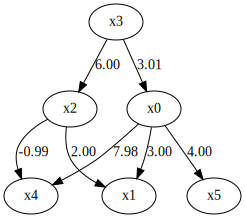

In [2]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

model = lingam.DirectLiNGAM()
model.fit(X)
make_dot(model.adjacency_matrix_)

If we want to change the variable name, we can use `labels`.

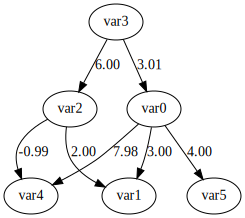

In [3]:
labels = [f'var{i}' for i in range(X.shape[1])]
make_dot(model.adjacency_matrix_, labels=labels)

## Save graph
The created dot data can be saved as an image file in addition to being displayed in Jupyter Notebook.

In [4]:
dot = make_dot(model.adjacency_matrix_, labels=labels)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

'dag.png'

## Draw the result of LiNGAM with prediction model
For example, we create a linear regression model with x0 as the target variable.

In [5]:
from sklearn.linear_model import LinearRegression

target = 0
features = [i for i in range(X.shape[1]) if i != target]
reg = LinearRegression()

reg.fit(X.iloc[:, features], X.iloc[:, target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

By specify `prediction_feature_indices` and `prediction_coefs` that can be obtained from the prediction model, we can draw the prediction model with the causal structure.

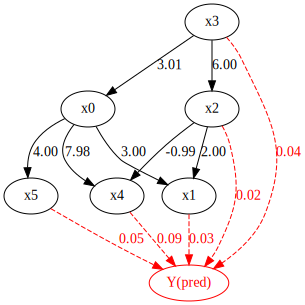

In [6]:
make_dot(model.adjacency_matrix_, prediction_feature_indices=features, prediction_coefs=reg.coef_)

Also, we can change the label of the target variable by `prediction_target_label`, omit the coefficient of prediction model without `prediction_coefs`, and change the color by `prediction_line_color`.

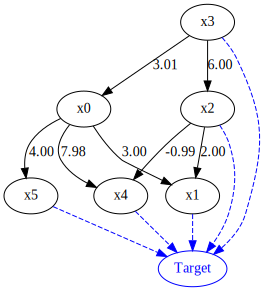

In [7]:
make_dot(model.adjacency_matrix_, prediction_feature_indices=features, prediction_target_label='Target', prediction_line_color='#0000FF')

In addition to the above, we can use `prediction_feature_importance` to draw the importance of the prediction model as an edge label.

In [8]:
import lightgbm as lgb

target = 0
features = [i for i in range(X.shape[1]) if i != target]
reg = lgb.LGBMRegressor(random_state=0)
reg.fit(X.iloc[:, features], X.iloc[:, target])
reg.feature_importances_

array([619, 205, 310, 957, 909])

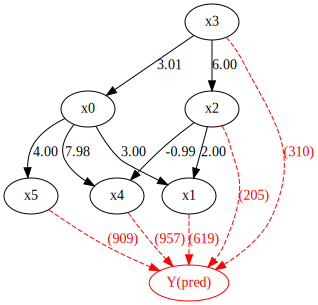

In [9]:
make_dot(model.adjacency_matrix_, prediction_feature_indices=features, prediction_feature_importance=reg.feature_importances_)